In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [62]:
npontos=int(input('Forneça a quantidade de pontos dados: '))
ordem=npontos
ii=np.linspace(0,ordem-1,ordem)
xi=[]
vector=[]
for i in ii:
    c=float(input('Forneça cada valor de xi: '))
    vector.append(c)
    xi.append(vector)
    vector=[]
print (xi)
yi=[]
vector=[]
for i in ii:
    c=float(input('Forneça cada valor de yi: '))
    vector.append(c)
    yi.append(vector)
    vector=[]
print (yi)

Forneça a quantidade de pontos dados: 4
Forneça cada valor de xi: -40
Forneça cada valor de xi: 0
Forneça cada valor de xi: 20
Forneça cada valor de xi: 50
[[-40.0], [0.0], [20.0], [50.0]]
Forneça cada valor de yi: 1.52
Forneça cada valor de yi: 1.29
Forneça cada valor de yi: 1.2
Forneça cada valor de yi: 1.09
[[1.52], [1.29], [1.2], [1.09]]


In [63]:
def gera_diferencas_divididas(npontos,xi,yi):
    xi=np.array(xi)
    yi=np.array(yi)
    dif_div=np.zeros((npontos,npontos+1))
    k=0
    while k < npontos:
        dif_div[k,0]=xi[k]
        k=k+1
    k=0
    while k < npontos:
        dif_div[k,1]=yi[k]
        k=k+1
    col=2
    while col<npontos+1:
        k=0
        while k < npontos - col+1:
            dif_div[k,col]=(dif_div[k+1,col-1]-dif_div[k,col-1])/(dif_div[(k+col-1),0]-dif_div[k,0])
            k=k+1
        col=col+1
    return dif_div

In [64]:
matriz_Newton=gera_diferencas_divididas(npontos,xi,yi)

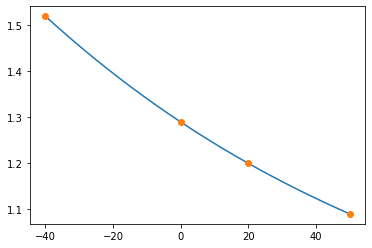

In [65]:
xx=np.linspace(min(xi),max(xi),1000)
yy=[]
for x in xx:
    soma=matriz_Newton[0,1]
    k=1
    z=0
    p=1
    while k < npontos:
        
        while z < k:
            p=p*(x-matriz_Newton[z,0])   
            z=z+1
        soma=soma+p*matriz_Newton[0,k+1] 
        k=k+1
    yy.append(soma)  
plt.plot(xx, yy, label="Polinomio Interpolador")
plt.plot(xi, yi, 'o', label="Pontos dados")

In [66]:
def gera_estimativa_f(win):
    soma=matriz_Newton[0,1]
    k=1
    z=0
    p=1
    while k < npontos:
        
        while z < k:
            p=p*(win-matriz_Newton[z,0])   
            z=z+1
        soma=soma+p*matriz_Newton[0,k+1] 
        k=k+1
    return soma

In [67]:
# Obter z tal que f(z) = 2 => g(z) = f(z)-2 => Raiz de g(z)
def g(x):
    return gera_estimativa_f(x)-1.45

In [68]:
def falsa_posicao(a,b,epsilon,maxiter=50):
    fxa=g(a)
    fxb=g(b)
    xra = a
    xr=(a*fxb-b*fxa)/(fxb-fxa)
    fxr=g(xr)
    niter=1
    erro = abs((xr-xra)/xr)
    xra = xr
    verro = []
    verro.append(erro)
    while niter < maxiter and erro > epsilon:
        if fxa*fxr > 0 and fxb*fxr > 0:
            print("Escolha incorreta das estimativas")
            return 0
        if fxa*fxr < 0:
            b=xr
            fxb=g(b)
            xr=(a*fxb-b*fxa)/(fxb-fxa)
            print(xr)
            fxr=g(xr)
            erro = abs((xr-xra)/xr)
            xra = xr
            verro.append(erro)
            niter=niter+1
        else:
            if fxr == 0:
                return xr
            a=xr
            fxa=g(a)
            xr=(a*fxb-b*fxa)/(fxb-fxa)
            print(xr)
            fxr=g(xr)
            erro = abs((xr-xra)/xr)
            xra=xr
            verro.append(erro)
            niter=niter+1
    return xr     

In [48]:
xr2 = falsa_posicao(-40,0,1e-5,maxiter=50)
print(xr2)

-28.941041785918717
-28.9814766148833
-28.982937464615723
-28.982990235675615
-28.982990235675615


In [39]:
xr2

0.6950640886711226

In [54]:
gera_estimativa_f(1.45)

-29.51690821256037

In [60]:
gera_estimativa_f(1.45)

-28.855593344976523

In [61]:
(-28.855593344976523-(-29.51690821256037))/(-28.855593344976523)

-0.022918082455544997

In [69]:
xr2 = falsa_posicao(-40,0,1e-5,maxiter=50)
print(xr2)

-29.047649041897948
-29.098472593005482
-29.10058198828651
-29.100669528364243
-29.100669528364243


In [70]:
(-29.100669528364243 - (-28.982990235675615))/(-29.100669528364243)

0.004043868907343406